# Esame finale

Il dataset è preso dalla [pagina](https://github.com/owid/covid-19-data/tree/master/public/data)
Download our complete COVID-19 dataset:
[CSV](https://covid.ourworldindata.org/data/owid-covid-data.csv)

In [1]:
# Creazione variabile contenente il csv
import os
os.chdir('C:/Users/Carlo/EPICODE/Esercizi')
import pandas as pd
db = pd.read_csv('covid.csv')

# Svolgimento punto 1
display(db.shape)
db.info()

(429435, 67)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

<span style="color: green;">
    
- [x] Esercizio 1</span>

In [2]:
# Setup iniziale
import humanize # Per una migliore lettura del numero
def leggi_numero_int(x):
    try:
        return humanize.intcomma(int(x))
    except:
        return ''

# Setup filtri
filtro_world = {'World'}
filtro_continenti = {'Africa','Asia','Europe','North America','Oceania','South America'}

# Calcolo casi totali nel mondo
db_world = db[db['location'].isin(filtro_world)]
tot_casi = db_world['total_cases'].max()

# Svolgimento punto 2
db_continenti = db[db['location'].isin(filtro_continenti)]
visualizza = db_continenti.groupby('location')['total_cases'].max().reset_index()
visualizza['Percentuali'] = visualizza['total_cases'] / tot_casi * 100

# Processi data visualisation 
visualizza['total_cases'] = visualizza['total_cases'].apply(leggi_numero_int)
visualizza['Percentuali'] = pd.Series.round(visualizza['Percentuali'], 2)
visualizza['Percentuali'] = [f'{x} %' for x in visualizza['Percentuali']]

visualizza = visualizza.rename(columns={
    'location': 'Continenti',
    'total_cases': 'Casi Totali',
}).set_index('Continenti')

visualizza

,Casi Totali,Percentuali
Continenti,,
Africa,"13,145,380",1.69 %
Asia,"301,499,099",38.86 %
Europe,"252,916,868",32.6 %
North America,"124,492,666",16.05 %
Oceania,"15,003,352",1.93 %
South America,"68,809,418",8.87 %


<span style="color: green;">

- [x] Esercizio 2</span>

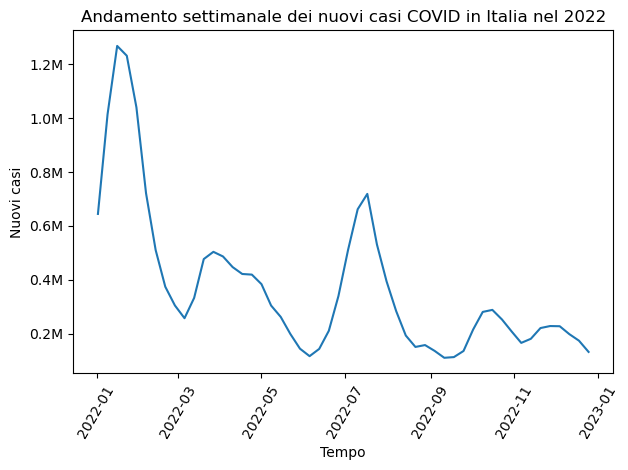

Scrivi il mese da visualizare: 1


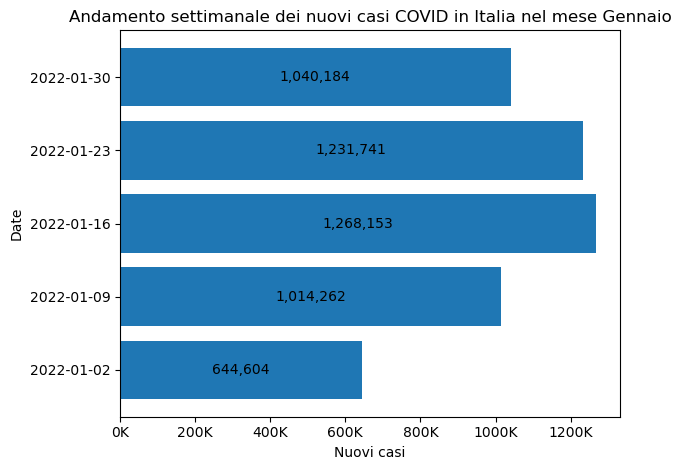

In [3]:
# Setup iniziale
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker # Usato per facilitare la visualizzazione del valore per l'asse y

def format_tick_M_dec(x, pos=None):  # pos è la posizione del valore
    return f'{x / 1_000_000:.1f}M' # con decimale

def format_tick_K(x, pos=None):  # pos è la posizione del valore
    return f'{x / 1_000:.0f}K'

s_mese = [
    ['gennaio', 'january', '1', '01'],
    ['febbraio', 'february', '2', '02'],
    ['marzo', 'march', '3', '03'],
    ['aprile', 'april', '4', '04'],
    ['maggio', 'may', '5', '05'],
    ['giugno', 'june', '6', '06'],
    ['luglio', 'july', '7', '07'],
    ['agosto', 'august', '8', '08'],
    ['settembre', 'september', '9', '09'],
    ['ottobre', 'october', '10'],
    ['novembre', 'november', '11'],
    ['dicembre', 'december', '12']
]

def seleziona_mese():
    x = input('Scrivi il mese da visualizare:').lower() # Si consiglia di scrivere almeno 3 lettere per sicurezza
    x = x[:3]
    if x != '0':
        for mes in s_mese:
            for m in mes:
                if m.startswith(x):
                    return mes[2]
    return seleziona_mese()

# Setup filtri
filtro_paesi = {'Italy'}
filtro_anni = {2022}
filtro = [0] # Filtro per togliere i giorni che non hanno misurazione

# Filtro
visualizza = db[db['location'].isin(filtro_paesi)].copy()
visualizza['date'] = pd.to_datetime(visualizza['date'])
visualizza = visualizza[visualizza['date'].dt.year.isin(filtro_anni)]
visualizza = visualizza[visualizza['new_cases'] != 0]

# Svolgimento punto 3
plt.plot(visualizza['date'], visualizza['new_cases'])

# Setup grafico
plt.xlabel('Tempo')
plt.ylabel('Nuovi casi')
plt.title('Andamento settimanale dei nuovi casi COVID in Italia nel 2022')
plt.xticks(rotation=60)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_tick_M_dec)) # Modifica alla formattazione dell'asse y
plt.tight_layout() # Regola in modo automatico la spaziatura

# Visualizzazione grafico
plt.show()

# Secondo grafico
mese = seleziona_mese()
visualizza = visualizza[visualizza['date'].dt.month == int(mese)]
visualizza['date'] = visualizza['date'].dt.strftime('%Y-%m-%d')

fig, asse_x = plt.subplots() # Accedo all'asse x
grafico = asse_x.barh(visualizza['date'], visualizza['new_cases'])
asse_x.bar_label(grafico, fmt=leggi_numero_int, label_type='center') # Aggiunge i valori numerici al centro di ogni barra
mese = s_mese[int(mese)-1][0].capitalize()

# Setup grafico
plt.xlabel('Nuovi casi')
plt.ylabel('Date')
plt.title(f'Andamento settimanale dei nuovi casi COVID in Italia nel mese {mese}')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_tick_K)) # Modifica alla formattazione dell'asse x
plt.tight_layout() # Regola in modo automatico la spaziatura

# Visualizzazione grafico
plt.show()

<span style="color: green;">

- [x] Esercizio 3</span>

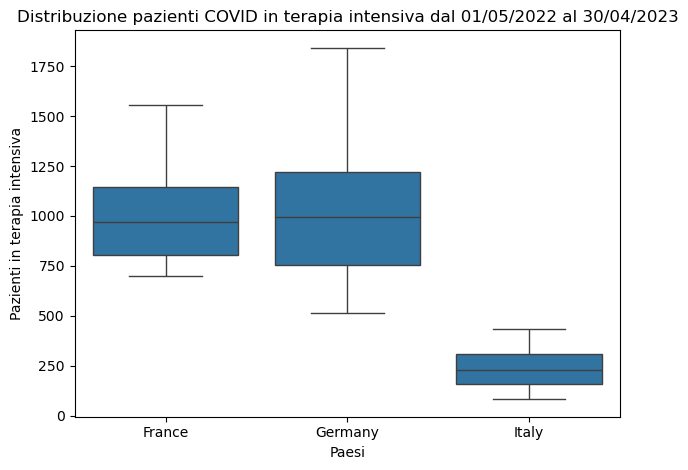

In [4]:
# Setup iniziale
import seaborn as sns

# Setup filtri
filtro_paesi = {'Italy', 'Germany', 'France'}
filtro_date = ['2022-05-01','2023-04-30']

# Filtro
visualizza = db[db['location'].isin(filtro_paesi)].copy()
visualizza['date'] = pd.to_datetime(visualizza['date'])
date = pd.to_datetime(filtro_date)
visualizza = visualizza[(visualizza['date'] >= date[0]) & (visualizza['date'] <= date[1])]

# Svolgimento punto 4
sns.boxplot(data=visualizza, x='location', y='icu_patients')
date = date.strftime('%d/%m/%Y')

# Setup grafico
plt.xlabel('Paesi')
plt.ylabel('Pazienti in terapia intensiva')
plt.title(f'Distribuzione pazienti COVID in terapia intensiva dal {date[0]} al {date[1]}')
plt.tight_layout() # Regola in modo automatico la spaziatura

# Visualizzazione grafico
plt.show()

Nel periodo analizzato in ogni settimana, il numero di pazienti in terapia intensiva per l'Italia è stato inferiore ai valori misurati in una qualsiasi settimana per la Francia e la Germania. Si rileva inoltre che i valori medi nel periodo per Francia e Germania sono molto vicini ma la variabilità della Germania è superiore.

Nota: Per i dati 'icu_patients' della Francia manca il mese di aprile

<span style="color: green;">

- [x] Esercizio 4</span>

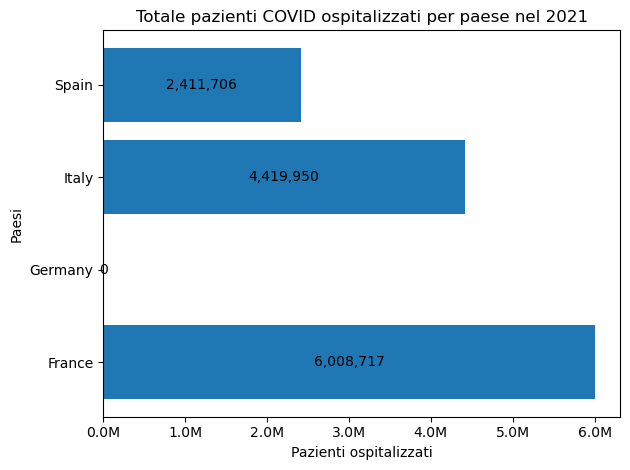

In [5]:
# Setup filtri
filtro_paesi = {'Italy', 'Germany', 'France','Spain'}
filtro_anni = {2021}

# Filtro
visualizza = db[db['location'].isin(filtro_paesi)].copy()
visualizza['date'] = pd.to_datetime(visualizza['date'])
visualizza = visualizza[visualizza['date'].dt.year.isin(filtro_anni)]
visualizza = visualizza.groupby('location')['hosp_patients'].sum().reset_index()

# Svolgimento punto 5
fig, asse_x = plt.subplots() # Accedo all'asse x
grafico = asse_x.barh(visualizza['location'], visualizza['hosp_patients'])
asse_x.bar_label(grafico, fmt=leggi_numero_int, label_type='center') # Aggiunge i valori numerici al centro di ogni barra

# Setup grafico
plt.xlabel('Pazienti ospitalizzati')
plt.ylabel('Paesi')
plt.title('Totale pazienti COVID ospitalizzati per paese nel 2021')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_tick_M_dec)) # Modifica alla formattazione dell'asse x
plt.tight_layout() # Regola in modo automatico la spaziatura

# Visualizzazione grafico
plt.show()

Dall'analisi effettuata si è rilevato che nel dataset sorgente non sono presenti i dati della Germania.
Per integrare i dati relativi alla Germania, si è ananizzato il dataset
[covid-hospitalizations.csv](https://github.com/owid/covid-19-data/blob/master/public/data/hospitalizations/covid-hospitalizations.csv)
.
Su tale dataset sono stati rilevati solo dati parziali fino al 27.06.2021. Per poter stimare il valore dell'intero anno si propongono le seguenti modalità:
1) **Applicazione del valore percentuale del paese con numeriche più vicine.**

   Si identifica quale paese ha le numeriche più vicine a quelle della Germania nel periodo 01.01.2021 - 27.06.2021 e si calcola quale è la percentuale tra tale valore e il totale annuo del paese.

   Si divide il valore nel periodo 01.01.2021 - 27.06.2021 in Germania per tale percentuale.

3) **Applicazione del valore percentuale medio degli altri paesi.**

   Si misurano i valori rilevati negli altri paesi nel periodo 01.01.2021 - 27.06.2021 e si calcola quale è la percentuale tra tale valore e il totale annuo dei paesi.

   Si divide il valore nel periodo 01.01.2021 - 27.06.2021 in Germania per tale percentuale.

<span style="color: green;">

- [x] Esercizio 5</span>